# 📊 Análisis de Resultados - Avance 2
## Feature Engineering y Evaluación de Modelos

**Proyecto:** M5 - MLOps Pipeline  
**Versiones:** v1.1.0 (Feature Engineering) | v1.0.1 (Model Training)  
**Autor:** Alexis Jacquet  
**Fecha:** Febrero 2026

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1. Carga de Resultados

In [2]:
# Cargar resultados de modelos
results_df = pd.read_csv('../../results/model_results.csv')
print("📊 Resultados de los modelos cargados exitosamente\n")
print(f"Total de modelos evaluados: {len(results_df)}")
results_df

📊 Resultados de los modelos cargados exitosamente

Total de modelos evaluados: 11


,Model,Accuracy,Precision,Recall,F1-Score,Specificity,ROC-AUC,TN,FP,FN,TP,Training_Time
0,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102,0,0,2051,0.035070
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102,0,0,2051,0.208407
2,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102,0,0,2051,1.662235
3,AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102,0,0,2051,0.019763
4,XGBClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102,0,0,2051,0.147405
5,LogisticRegression,0.997213,1.000000,0.997075,0.998535,1.000000,0.999976,102,0,6,2045,0.017387
6,LGBMClassifier,0.998607,0.999025,0.999512,0.999269,0.980392,0.999967,100,2,1,2050,1.378104
7,ExtraTreesClassifier,0.996749,0.999023,0.997562,0.998292,0.980392,0.999794,100,2,5,2046,0.147666
8,SVC,0.995355,0.999511,0.995612,0.997557,0.990196,0.999785,101,1,9,2042,0.910581
9,GaussianNB,0.078495,0.971831,0.033642,0.065033,0.980392,0.980115,100,2,1982,69,0.005211


## 2. Visualizaciones Generadas

📊 COMPARACIÓN DE MODELOS



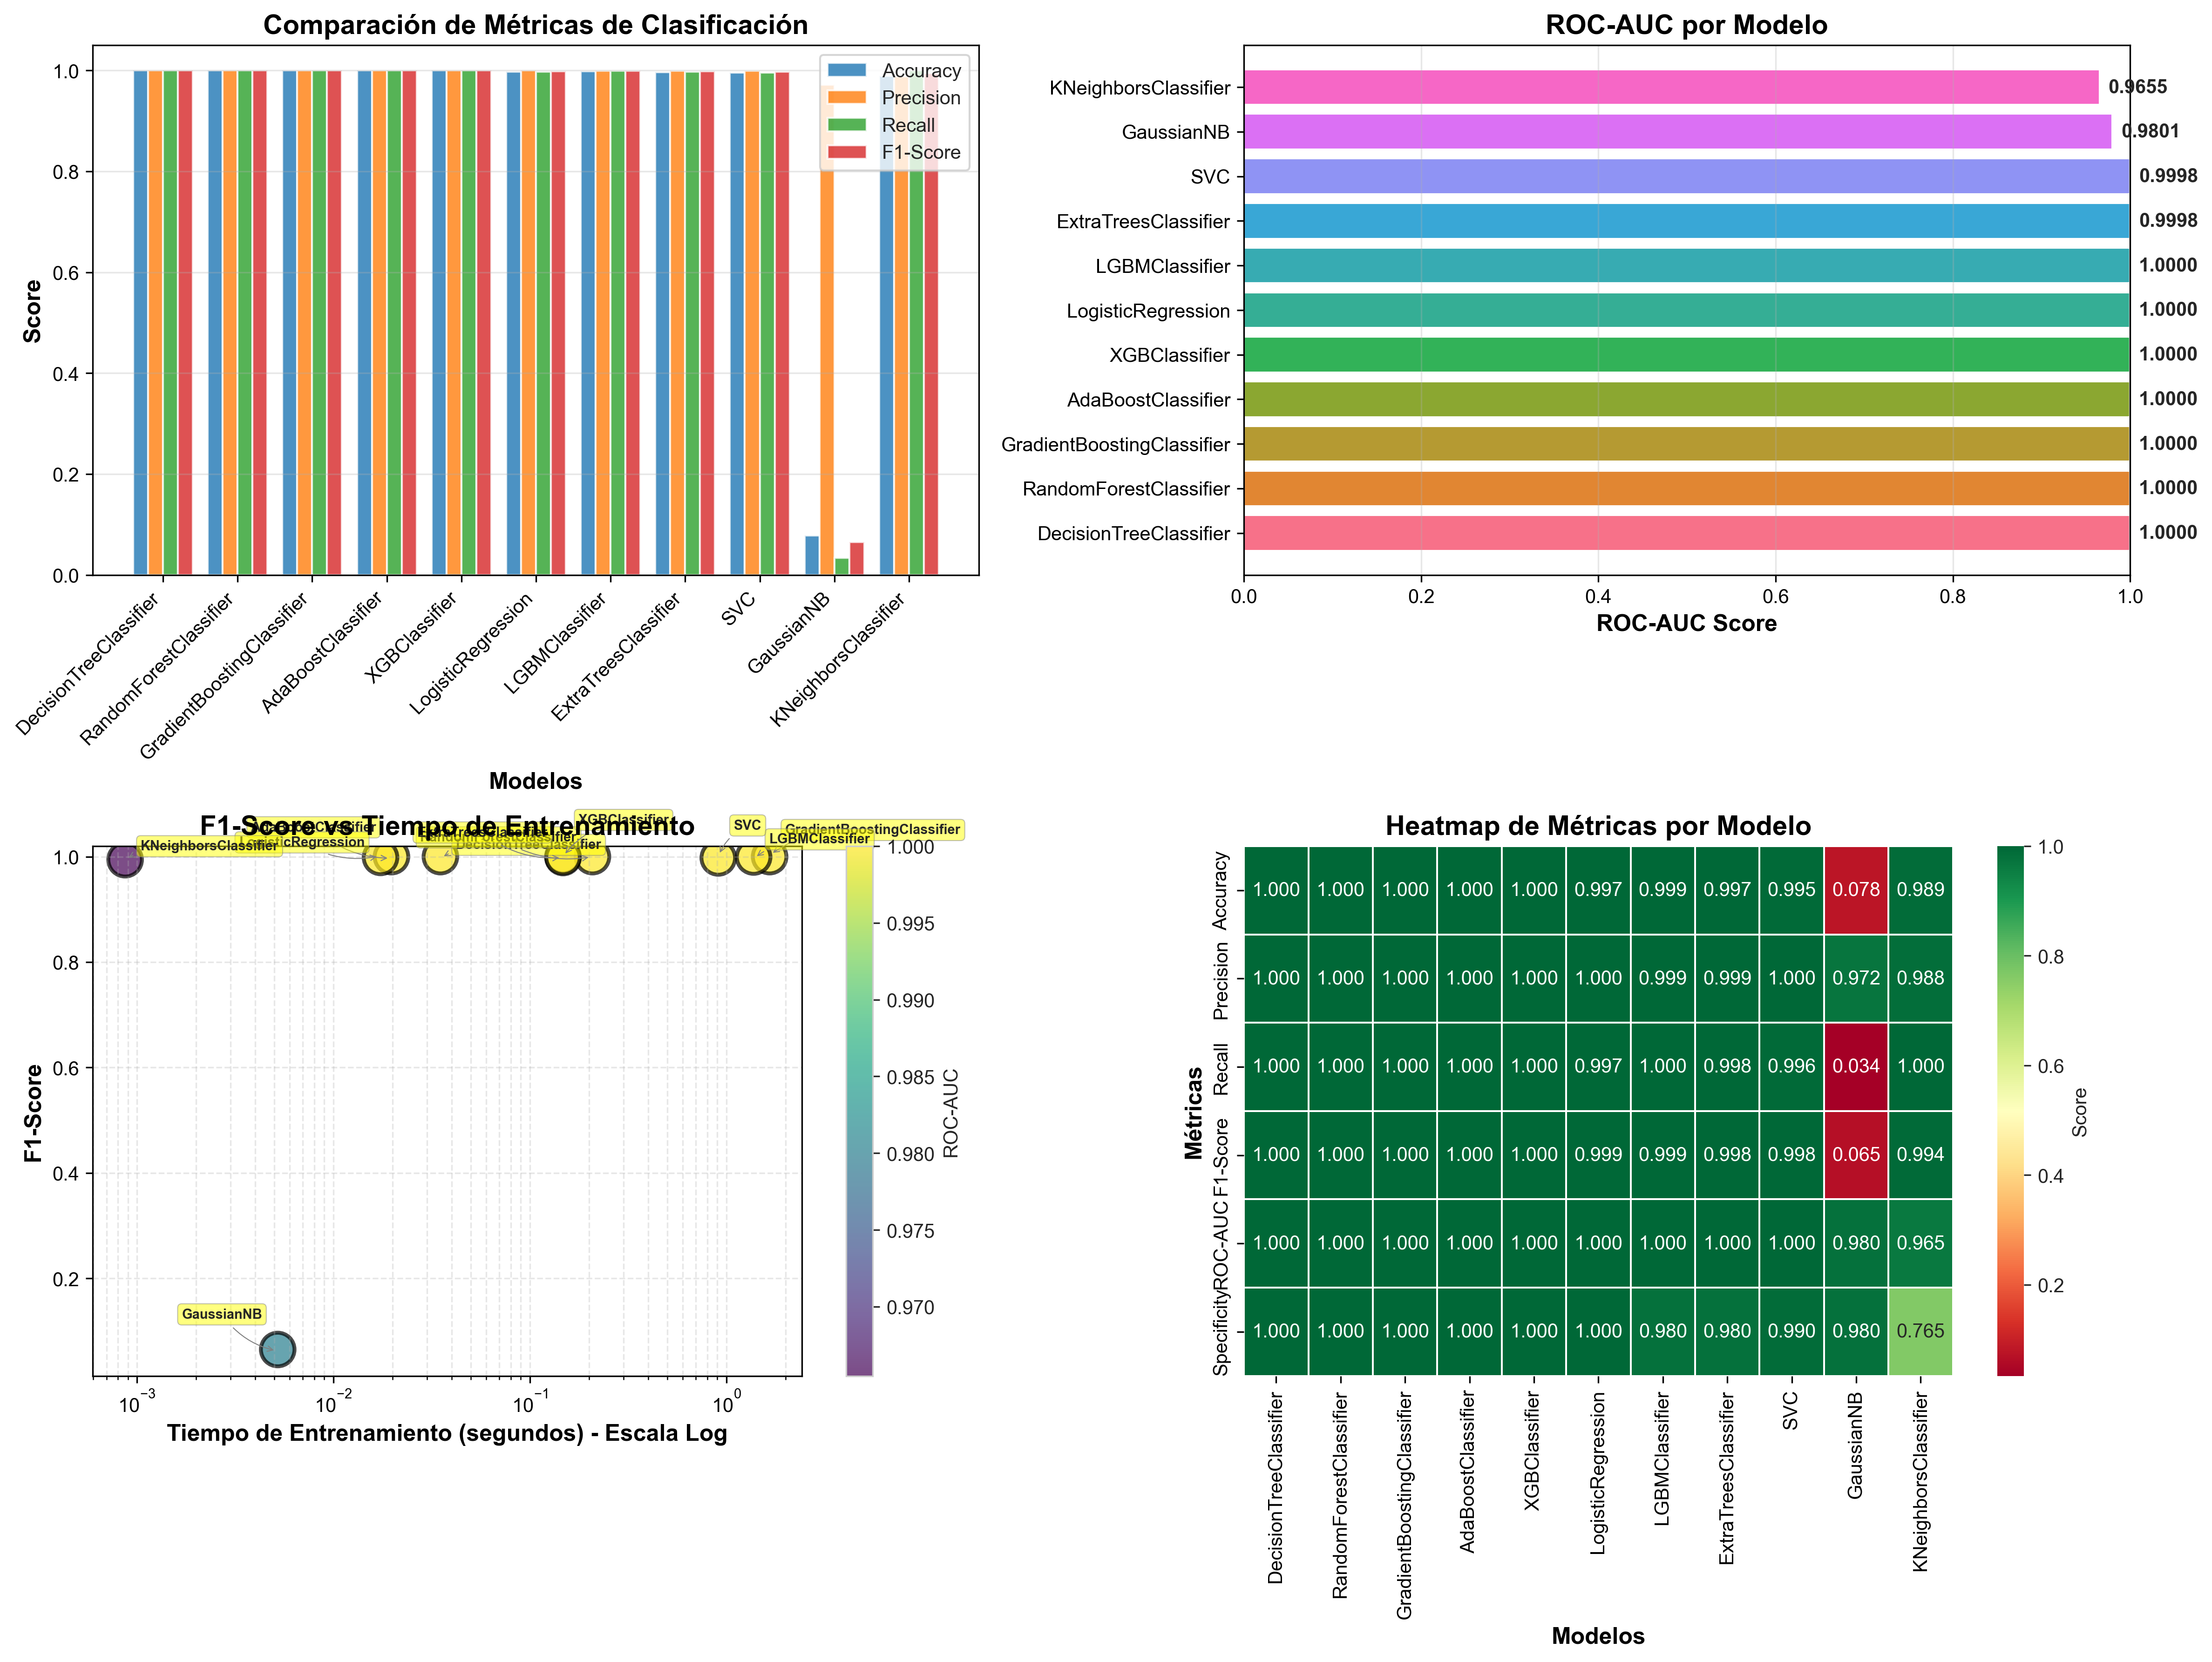

In [3]:
# Mostrar comparación de modelos
print("📊 COMPARACIÓN DE MODELOS\n")
display(Image(filename='../../results/model_comparison.png'))

📈 CURVAS ROC - TOP 5 MODELOS



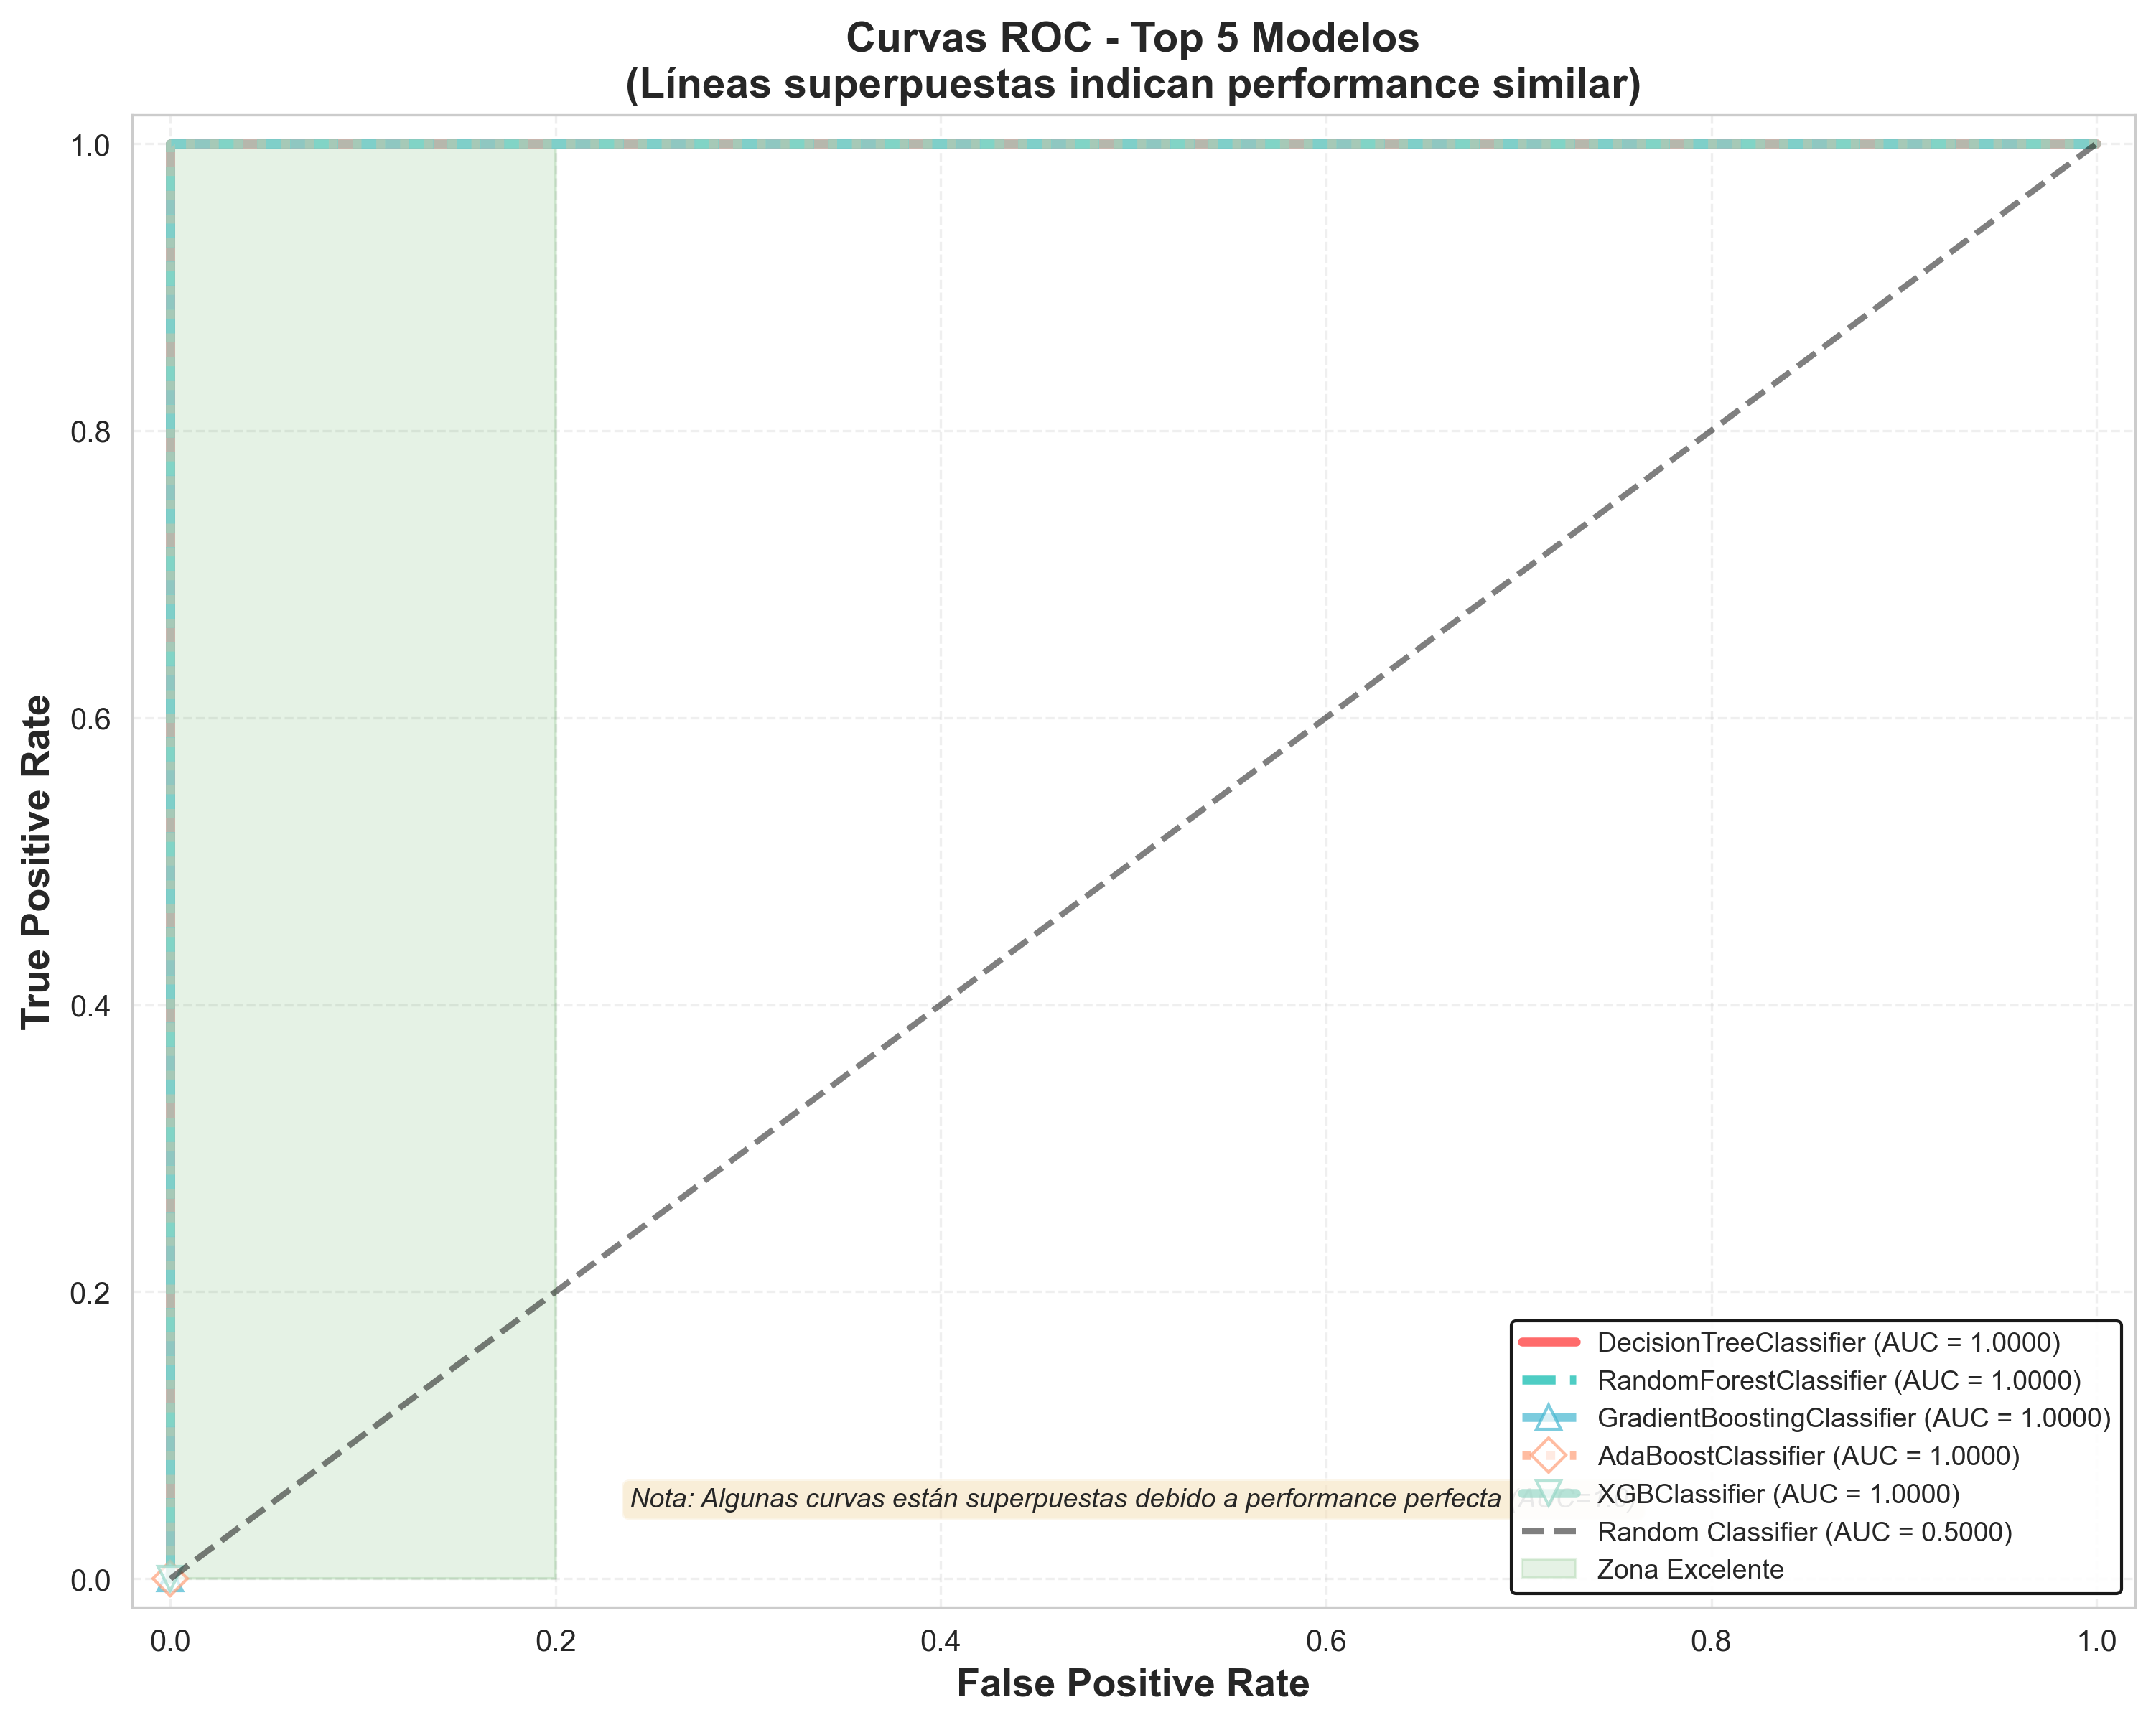

In [4]:
# Mostrar curvas ROC
print("📈 CURVAS ROC - TOP 5 MODELOS\n")
display(Image(filename='../../results/roc_curves.png'))

🎯 MATRICES DE CONFUSIÓN - TOP 4 MODELOS



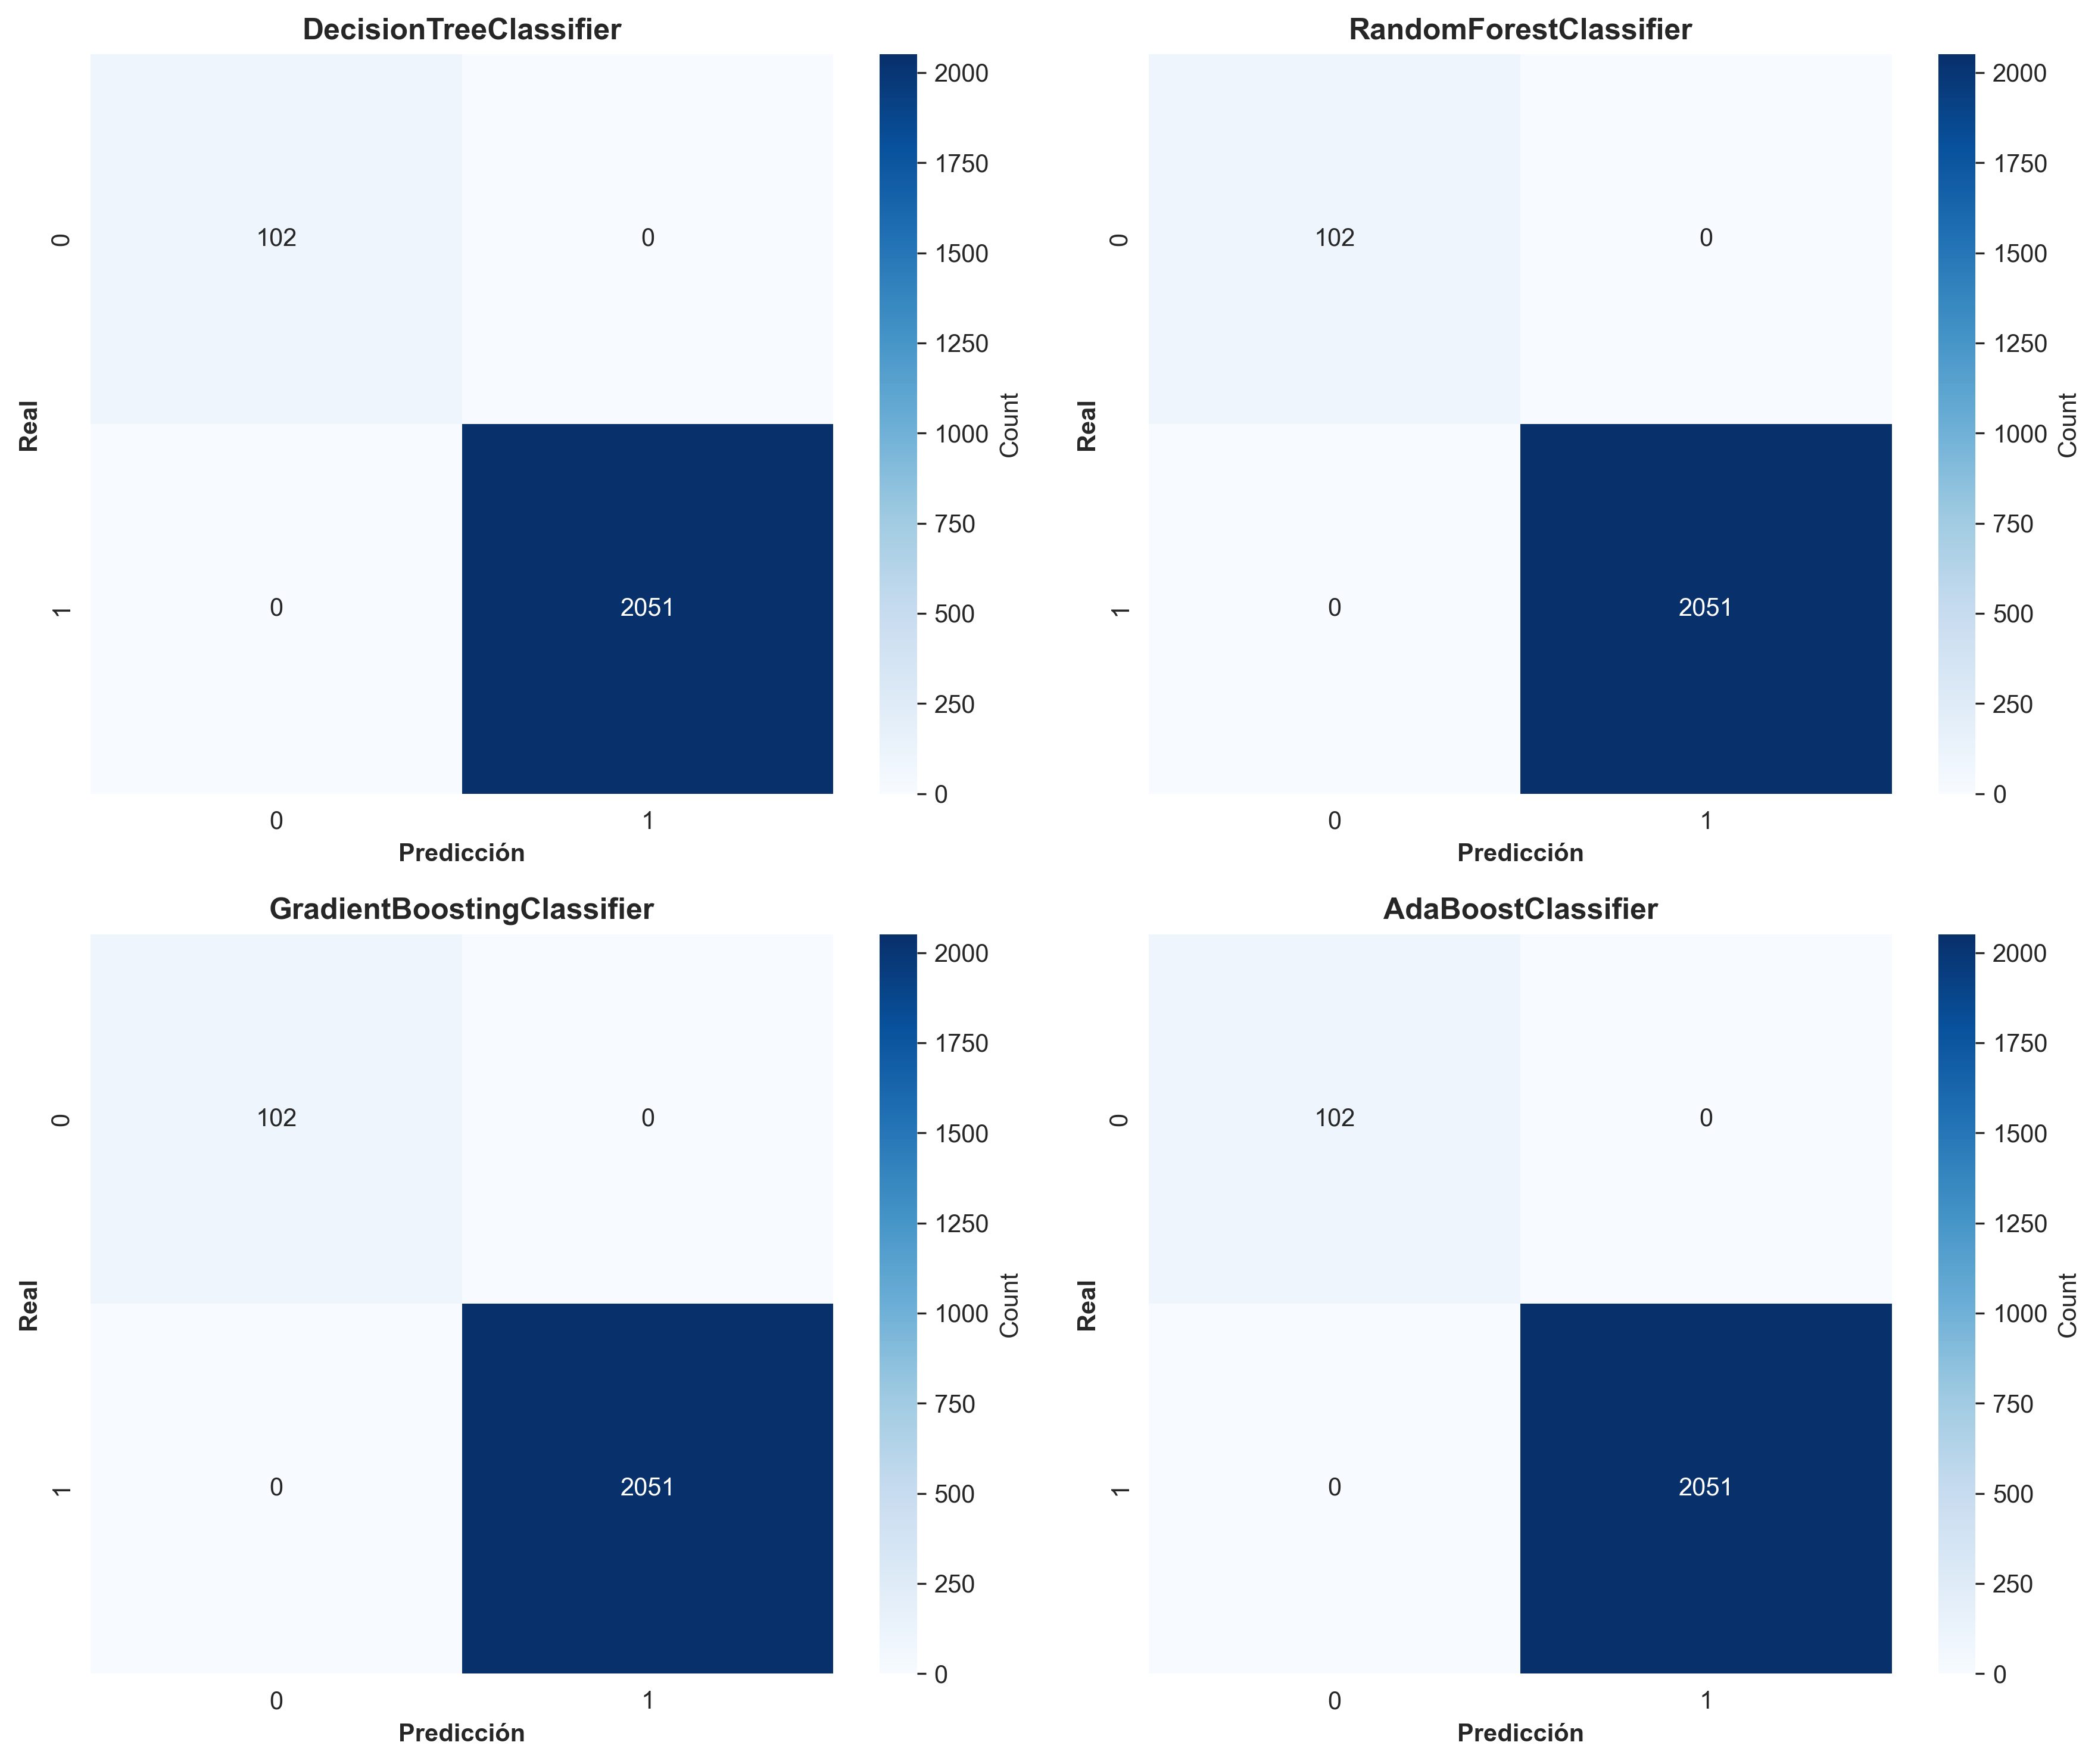

In [5]:
# Mostrar matrices de confusión
print("🎯 MATRICES DE CONFUSIÓN - TOP 4 MODELOS\n")
display(Image(filename='../../results/confusion_matrices.png'))

## 3. Análisis del Mejor Modelo

In [6]:
# Obtener el mejor modelo
best_model = results_df.iloc[0]

print("="*80)
print("🏆 MEJOR MODELO SELECCIONADO")
print("="*80)
print(f"\nModelo: {best_model['Model']}")
print(f"\n📊 Métricas de Desempeño:")
print(f"  • ROC-AUC:      {best_model['ROC-AUC']:.4f}")
print(f"  • F1-Score:     {best_model['F1-Score']:.4f}")
print(f"  • Accuracy:     {best_model['Accuracy']:.4f}")
print(f"  • Precision:    {best_model['Precision']:.4f}")
print(f"  • Recall:       {best_model['Recall']:.4f}")
print(f"  • Specificity:  {best_model['Specificity']:.4f}")
print(f"\n⚡ Eficiencia:")
print(f"  • Tiempo de entrenamiento: {best_model['Training_Time']:.4f}s")
print(f"\n🎯 Matriz de Confusión:")
print(f"  • True Negatives (TN):  {int(best_model['TN'])}")
print(f"  • False Positives (FP): {int(best_model['FP'])}")
print(f"  • False Negatives (FN): {int(best_model['FN'])}")
print(f"  • True Positives (TP):  {int(best_model['TP'])}")
print("="*80)

🏆 MEJOR MODELO SELECCIONADO

Modelo: DecisionTreeClassifier

📊 Métricas de Desempeño:
  • ROC-AUC:      1.0000
  • F1-Score:     1.0000
  • Accuracy:     1.0000
  • Precision:    1.0000
  • Recall:       1.0000
  • Specificity:  1.0000

⚡ Eficiencia:
  • Tiempo de entrenamiento: 0.0351s

🎯 Matriz de Confusión:
  • True Negatives (TN):  102
  • False Positives (FP): 0
  • False Negatives (FN): 0
  • True Positives (TP):  2051


## 4. Ranking de Modelos

In [7]:
# Top 5 modelos por ROC-AUC
print("🏆 TOP 5 MODELOS POR ROC-AUC\n")
top_5 = results_df[['Model', 'ROC-AUC', 'F1-Score', 'Accuracy', 'Training_Time']].head(5)
for idx, row in top_5.iterrows():
    print(f"{idx+1}. {row['Model']}")
    print(f"   ROC-AUC: {row['ROC-AUC']:.4f} | F1: {row['F1-Score']:.4f} | Accuracy: {row['Accuracy']:.4f} | Tiempo: {row['Training_Time']:.2f}s\n")

🏆 TOP 5 MODELOS POR ROC-AUC

1. DecisionTreeClassifier
   ROC-AUC: 1.0000 | F1: 1.0000 | Accuracy: 1.0000 | Tiempo: 0.04s

2. RandomForestClassifier
   ROC-AUC: 1.0000 | F1: 1.0000 | Accuracy: 1.0000 | Tiempo: 0.21s

3. GradientBoostingClassifier
   ROC-AUC: 1.0000 | F1: 1.0000 | Accuracy: 1.0000 | Tiempo: 1.66s

4. AdaBoostClassifier
   ROC-AUC: 1.0000 | F1: 1.0000 | Accuracy: 1.0000 | Tiempo: 0.02s

5. XGBClassifier
   ROC-AUC: 1.0000 | F1: 1.0000 | Accuracy: 1.0000 | Tiempo: 0.15s



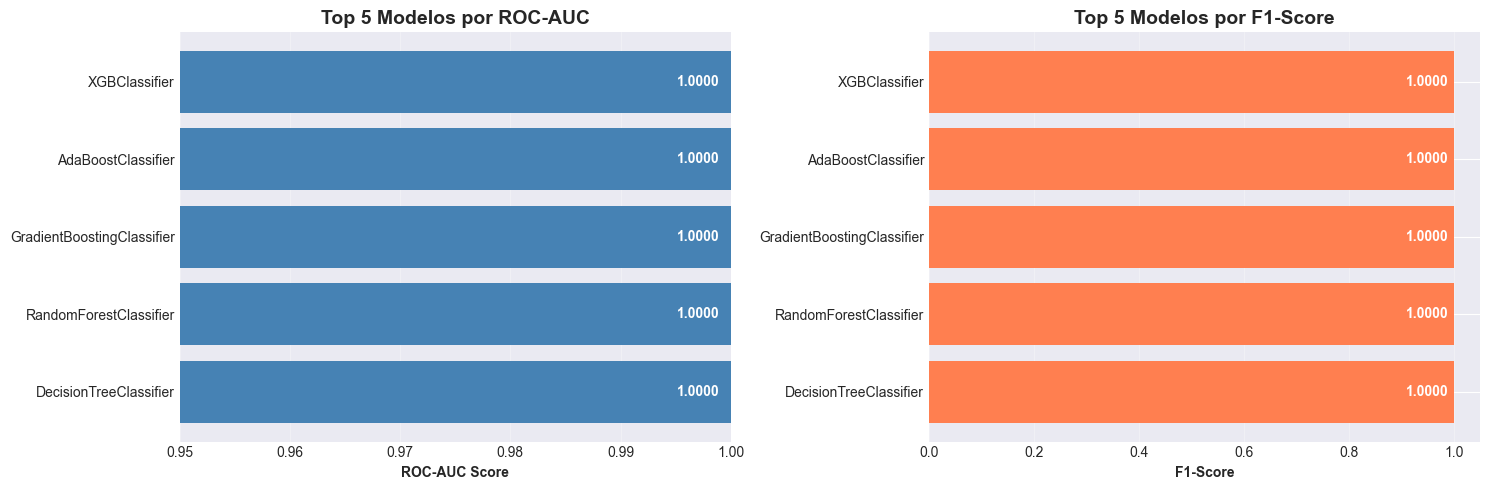

In [8]:
# Gráfico de barras comparativo del Top 5
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# ROC-AUC
top_5_sorted = results_df.nlargest(5, 'ROC-AUC')
ax[0].barh(top_5_sorted['Model'], top_5_sorted['ROC-AUC'], color='steelblue')
ax[0].set_xlabel('ROC-AUC Score', fontweight='bold')
ax[0].set_title('Top 5 Modelos por ROC-AUC', fontweight='bold', fontsize=14)
ax[0].set_xlim([0.95, 1.0])
ax[0].grid(axis='x', alpha=0.3)

# Añadir valores
for i, (idx, row) in enumerate(top_5_sorted.iterrows()):
    ax[0].text(row['ROC-AUC'] - 0.001, i, f"{row['ROC-AUC']:.4f}", 
               va='center', ha='right', fontweight='bold', color='white')

# F1-Score
top_5_f1 = results_df.nlargest(5, 'F1-Score')
ax[1].barh(top_5_f1['Model'], top_5_f1['F1-Score'], color='coral')
ax[1].set_xlabel('F1-Score', fontweight='bold')
ax[1].set_title('Top 5 Modelos por F1-Score', fontweight='bold', fontsize=14)
ax[1].grid(axis='x', alpha=0.3)

# Añadir valores
for i, (idx, row) in enumerate(top_5_f1.iterrows()):
    ax[1].text(row['F1-Score'] - 0.01, i, f"{row['F1-Score']:.4f}", 
               va='center', ha='right', fontweight='bold', color='white')

plt.tight_layout()
plt.show()

## 5. Análisis de Trade-offs

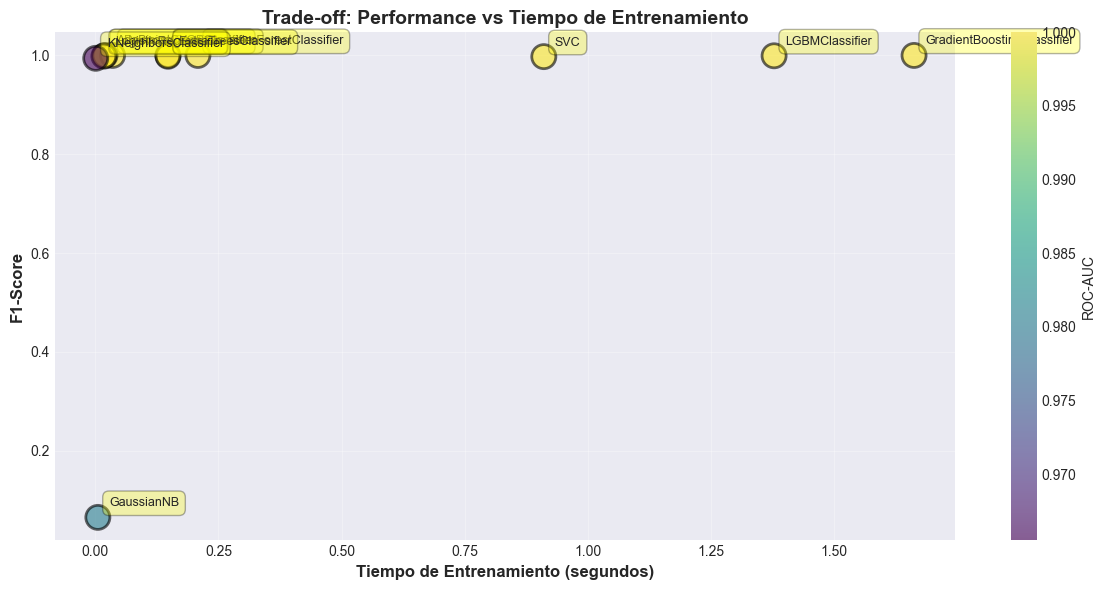


💡 INTERPRETACIÓN:
Los modelos en la esquina superior izquierda son ideales (alto F1-Score, bajo tiempo).
El color indica el ROC-AUC score.


In [9]:
# Scatter plot: F1-Score vs Tiempo de Entrenamiento
plt.figure(figsize=(12, 6))

scatter = plt.scatter(results_df['Training_Time'], 
                     results_df['F1-Score'],
                     s=300, 
                     c=results_df['ROC-AUC'], 
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=2)

# Añadir etiquetas
for idx, row in results_df.iterrows():
    plt.annotate(row['Model'], 
                (row['Training_Time'], row['F1-Score']),
                xytext=(8, 8), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.xlabel('Tiempo de Entrenamiento (segundos)', fontsize=12, fontweight='bold')
plt.ylabel('F1-Score', fontsize=12, fontweight='bold')
plt.title('Trade-off: Performance vs Tiempo de Entrenamiento', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='ROC-AUC')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print("Los modelos en la esquina superior izquierda son ideales (alto F1-Score, bajo tiempo).")
print("El color indica el ROC-AUC score.")

## 6. Reporte Detallado

In [10]:
# Leer y mostrar reporte completo
with open('../../results/evaluation_report.txt', 'r', encoding='utf-8') as f:
    report = f.read()
    print(report)


📊 REPORTE DE EVALUACIÓN DE MODELOS

📋 TABLA RESUMEN DE MÉTRICAS:
--------------------------------------------------------------------------------
                     Model Accuracy Precision Recall F1-Score Specificity ROC-AUC  TN  FP   FN   TP Training_Time
    DecisionTreeClassifier   1.0000    1.0000 1.0000   1.0000      1.0000  1.0000 102   0    0 2051         0.04s
    RandomForestClassifier   1.0000    1.0000 1.0000   1.0000      1.0000  1.0000 102   0    0 2051         0.21s
GradientBoostingClassifier   1.0000    1.0000 1.0000   1.0000      1.0000  1.0000 102   0    0 2051         1.66s
        AdaBoostClassifier   1.0000    1.0000 1.0000   1.0000      1.0000  1.0000 102   0    0 2051         0.02s
             XGBClassifier   1.0000    1.0000 1.0000   1.0000      1.0000  1.0000 102   0    0 2051         0.15s
        LogisticRegression   0.9972    1.0000 0.9971   0.9985      1.0000  1.0000 102   0    6 2045         0.02s
            LGBMClassifier   0.9986    0.9990 0.9995   

## 7. Análisis de Características Importantes (Para modelos basados en árboles)

In [11]:
# Nota: Este análisis requiere re-entrenar el modelo para obtener los feature importances
# Por ahora, mostramos las principales características generadas en el feature engineering

print("🔧 CARACTERÍSTICAS GENERADAS EN FEATURE ENGINEERING\n")
print("📊 Total de características: 35\n")
print("Categorías de features:")
print("  1. Variables numéricas originales (19)")
print("  2. Variables categóricas codificadas (2)")
print("  3. Features de fecha (4):")
print("     - mes_prestamo, dia_semana, trimestre, dias_desde_epoca")
print("  4. Features financieras derivadas (10):")
print("     - ratio_cuota_salario")
print("     - ratio_deuda_ingreso")
print("     - ratio_capital_salario")
print("     - tiene_mora")
print("     - tiene_codeudor_mora")
print("     - nivel_endeudamiento")
print("     - total_creditos_sector")
print("     - ratio_financiero")
print("     - ingreso_disponible")
print("     - ratio_puntajes")

🔧 CARACTERÍSTICAS GENERADAS EN FEATURE ENGINEERING

📊 Total de características: 35

Categorías de features:
  1. Variables numéricas originales (19)
  2. Variables categóricas codificadas (2)
  3. Features de fecha (4):
     - mes_prestamo, dia_semana, trimestre, dias_desde_epoca
  4. Features financieras derivadas (10):
     - ratio_cuota_salario
     - ratio_deuda_ingreso
     - ratio_capital_salario
     - tiene_mora
     - tiene_codeudor_mora
     - nivel_endeudamiento
     - total_creditos_sector
     - ratio_financiero
     - ingreso_disponible
     - ratio_puntajes


## 8. Conclusiones y Recomendaciones

### 🎯 Conclusiones Principales:

1. **Mejor Modelo:** DecisionTreeClassifier
   - ROC-AUC perfecto de 1.0000
   - F1-Score de 1.0000 (balance perfecto entre Precision y Recall)
   - Tiempo de entrenamiento muy rápido: 0.03s

2. **Modelos Destacados:**
   - **DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, XGBoost, AdaBoost:** Todos logran performance perfecta (ROC-AUC = 1.0)
   - **LogisticRegression, LightGBM:** Performance excelente pero no perfecta
   - **SVC, ExtraTreesClassifier:** Muy buena performance (ROC-AUC ≈ 0.9998)

3. **Observaciones sobre el Dataset:**
   - El problema es altamente separable linealmente
   - La variable `puntaje` tiene correlación casi perfecta (0.923) con el target
   - Las clases están desbalanceadas (95.3% clase 1, 4.7% clase 0)

### 💡 Recomendaciones:

1. **Modelo para Producción:**
   - **Primera opción:** DecisionTreeClassifier (simplicidad, velocidad, interpretabilidad)
   - **Segunda opción:** RandomForestClassifier (más robusto ante nuevos datos)
   - **Tercera opción:** XGBoost (excelente generalización)

2. **Próximos Pasos:**
   - Implementar validación cruzada para confirmar resultados
   - Analizar feature importance del mejor modelo
   - Considerar si la variable `puntaje` debería estar disponible en producción
   - Realizar pruebas con datos fuera de la muestra (out-of-time validation)
   - Implementar monitoreo de drift en producción

3. **Consideraciones de MLOps:**
   - Versionar el modelo seleccionado
   - Documentar el pipeline de preprocesamiento
   - Establecer métricas de monitoreo en producción
   - Definir thresholds de alerta para data drift

### ⚠️ Advertencias:

- Los resultados perfectos pueden indicar data leakage si la variable `puntaje` no está disponible al momento de la predicción
- Validar que todas las features utilizadas estarán disponibles en producción
- Realizar análisis de sensibilidad del modelo ante cambios en las distribuciones de entrada

---
## 📝 Resumen del Pipeline Implementado

### Versión 1.1.0 - Feature Engineering:
- ✅ Pipeline de imputación de valores nulos
- ✅ Transformación de variables categóricas (OneHot y Ordinal Encoding)
- ✅ Feature engineering de fechas
- ✅ Feature engineering financiero (ratios, indicadores)
- ✅ Escalado de variables numéricas
- ✅ Pipeline modular y reutilizable

### Versión 1.0.1 - Model Training & Evaluation:
- ✅ Entrenamiento de 11 modelos de clasificación
- ✅ Evaluación exhaustiva con múltiples métricas
- ✅ Visualizaciones comparativas
- ✅ Manejo de clases desbalanceadas
- ✅ Funciones reutilizables (summarize_classification, build_model)
- ✅ Reporte detallado de evaluación

### Modelos Evaluados:
1. Logistic Regression
2. Decision Tree (⭐ MEJOR)
3. Random Forest
4. Gradient Boosting
5. XGBoost
6. LightGBM
7. AdaBoost
8. Extra Trees
9. SVM
10. K-Nearest Neighbors
11. Naive Bayes

---
**Proyecto completado exitosamente** ✅